In [1]:
from sklearn.linear_model  import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X,y=load_diabetes(return_X_y=True)
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
lr.fit(x_train,y_train)
lr.predict(x_test)


array([154.1213881 , 204.81835118, 124.93755353, 106.08950893,
       258.5348576 , 256.3310074 , 118.75087616, 119.52440696,
       101.50816735, 190.54048661, 141.70656811, 172.51883961,
       174.33861649, 134.80942706, 294.13994537,  94.11798038,
       211.97059795, 156.49579378, 134.21000428, 119.62664644,
       148.87842251, 165.00873409, 151.10021038, 176.04063756,
       133.27769647, 221.29555392, 197.17324941,  96.1577688 ,
        50.26012711, 230.48580317, 242.06073866, 114.11129218,
        67.07532417,  94.52943825, 201.21415375, 167.05136201,
       159.881268  , 192.78746659, 114.49551325, 233.48234551,
       140.82563045, 121.0680409 , 192.27480772, 191.12738845,
       179.16865788, 148.34935601, 163.47414622, 276.81647884,
       100.17926432, 164.10555298, 255.80762189, 136.9466204 ,
       152.37503699, 107.92237882, 194.21924678,  77.34670792,
       118.50482479,  68.38335763, 154.29258529, 162.48840259,
       168.36788326, 156.87790322,  97.14191797, 238.16

In [3]:
X.shape

(442, 10)

In [4]:
r2=r2_score(y_true=y_test,y_pred=lr.predict(x_test))

In [5]:
adjustedr2=1-(1-r2)*(X.shape[0]-1)/(X.shape[0]-1-X.shape[1])
adjustedr2

0.42693929228582717

In [6]:
sr=StandardScaler()
sr.fit(x_train)
x_test_scaled=sr.transform(x_test)
x_train_scaled=sr.transform(x_train)
lr2=LinearRegression()
lr2.fit(x_train_scaled,y_train)
lr2.predict(x_test_scaled)
r2_score(y_true=y_test,y_pred=lr2.predict(x_test_scaled))

0.439933866156897

In [7]:
#hence we see doing scaling doesnt change the output

In [8]:
minmax=MinMaxScaler()
minmax.fit(x_train)
x_train_normalised=minmax.transform(x_train)
x_test_normalised=minmax.transform(x_test)
lr3=LinearRegression()
lr3.fit(x_train_normalised,y_train)
lr3.predict(x_test_normalised)
r2_score(y_true=y_test,y_pred=lr3.predict(x_test_normalised))

0.4399338661568969

In [9]:
#our custom class-->

class meralr:
    def __init__(self):
        self.intercept=None
        self.coeff=None
    def fit(self,x_train,y_train):
        x_train=np.insert(x_train,0,1,axis=1)
        self.coeff=np.linalg.inv(np.transpose(x_train).dot(x_train)).dot(np.transpose(x_train)).dot(y_train)
        self.intercept=self.coeff[0]
        self.coeff=self.coeff[1:]
    def predict(self,x_test):
        return np.dot(x_test,self.coeff)+self.intercept
lcc=meralr()
lcc.fit(x_train,y_train)
lcc.predict(x_test)



array([154.1213881 , 204.81835118, 124.93755353, 106.08950893,
       258.5348576 , 256.3310074 , 118.75087616, 119.52440696,
       101.50816735, 190.54048661, 141.70656811, 172.51883961,
       174.33861649, 134.80942706, 294.13994537,  94.11798038,
       211.97059795, 156.49579378, 134.21000428, 119.62664644,
       148.87842251, 165.00873409, 151.10021038, 176.04063756,
       133.27769647, 221.29555392, 197.17324941,  96.1577688 ,
        50.26012711, 230.48580317, 242.06073866, 114.11129218,
        67.07532417,  94.52943825, 201.21415375, 167.05136201,
       159.881268  , 192.78746659, 114.49551325, 233.48234551,
       140.82563045, 121.0680409 , 192.27480772, 191.12738845,
       179.16865788, 148.34935601, 163.47414622, 276.81647884,
       100.17926432, 164.10555298, 255.80762189, 136.9466204 ,
       152.37503699, 107.92237882, 194.21924678,  77.34670792,
       118.50482479,  68.38335763, 154.29258529, 162.48840259,
       168.36788326, 156.87790322,  97.14191797, 238.16

In [10]:
#now checking the assumptions






















In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
li=[]
for i in range(X.shape[1]):
    li.append(variance_inflation_factor(X,i))
li

[np.float64(1.2173065138070072),
 np.float64(1.2780710154103625),
 np.float64(1.509437373844548),
 np.float64(1.4594277776838307),
 np.float64(59.202510134318615),
 np.float64(39.1933699727707),
 np.float64(15.402156007513453),
 np.float64(8.890986360329626),
 np.float64(10.075967132038336),
 np.float64(1.4846226073834825)]

In [12]:
residue=y_test-lr.predict(x_test)


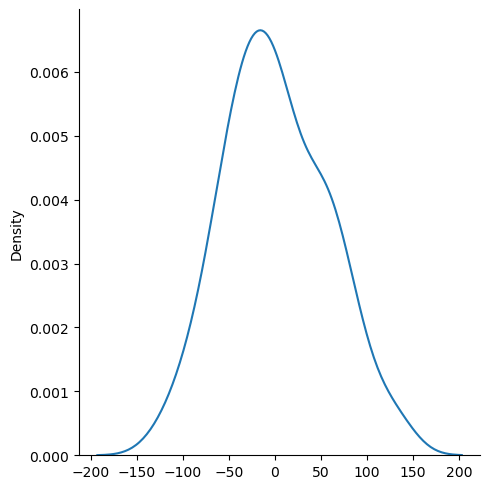

In [13]:
sns.displot(residue,kind='kde')

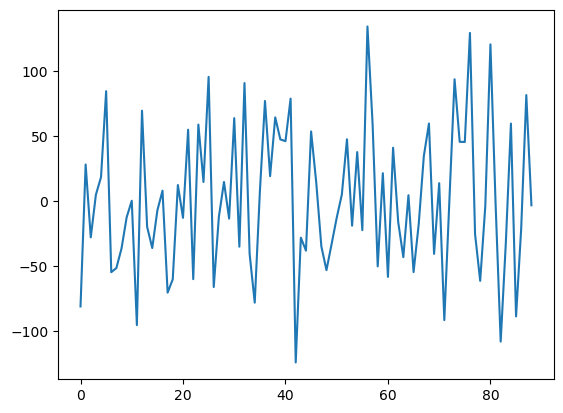

In [14]:
plt.plot(residue)

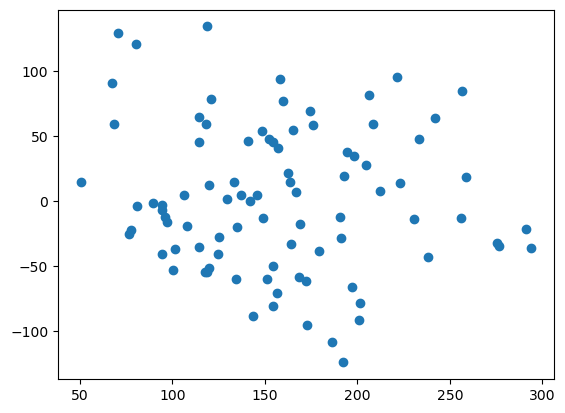

In [21]:
#checking homoscensoty
plt.scatter(lr.predict(x_test),residue)

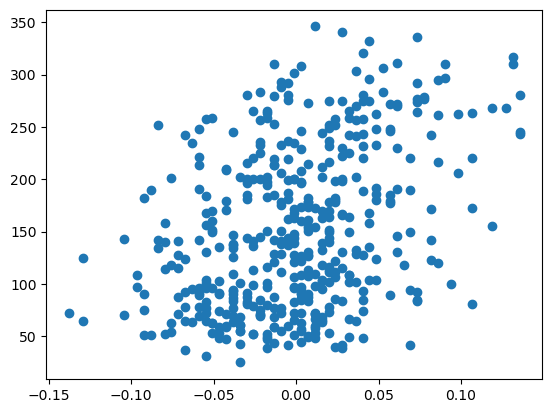

In [16]:
plt.scatter(X[:,9],y)

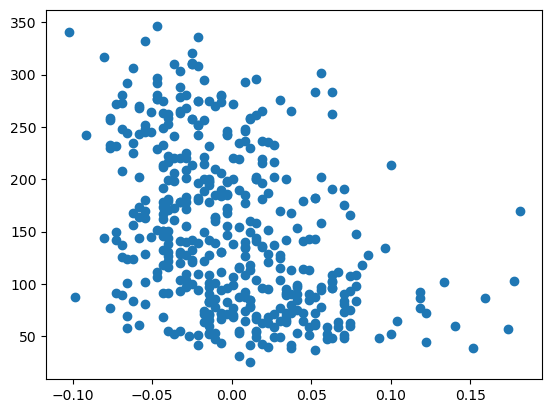

In [17]:
plt.scatter(X[:,6],y)

In [18]:
lr.score(x_test,y_test)

0.4399338661568969

In [19]:
mean_squared_error(y_true=y_test,y_pred=lr.predict(x_test))

3094.456671566062

In [20]:
# y.max()
# y.min()
mean_absolute_error(y_true=y_test,y_pred=lr.predict(x_test))

45.213034190469024